Missing values in each column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<ipython-input-2-586f3cfbf38a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


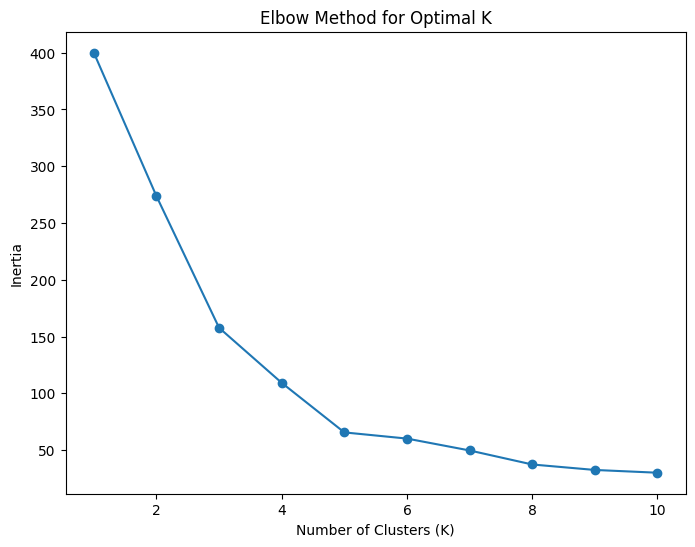

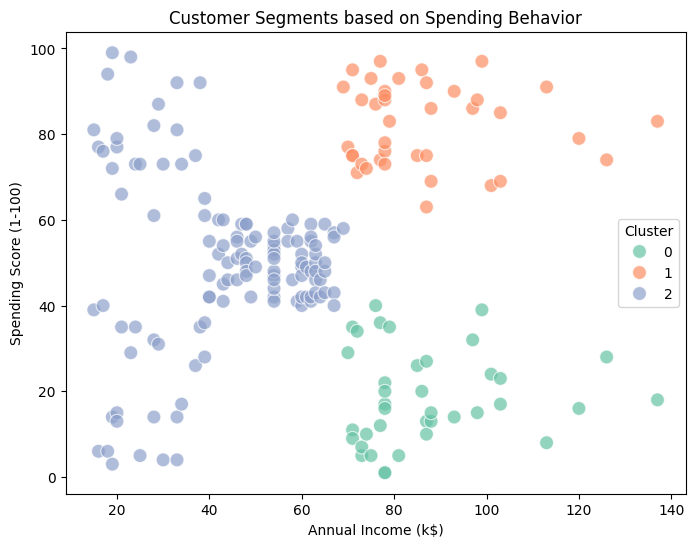

Cluster Centers:
    Annual Income (k$)  Spending Score (1-100)
0           87.000000               18.631579
1           86.538462               82.128205
2           44.154472               49.829268
        Annual Income (k$)            Spending Score (1-100)           
                      mean        std                   mean        std
Cluster                                                                
0                87.000000  16.271348              18.631579  10.915947
1                86.538462  16.312485              82.128205   9.364489
2                44.154472  16.037882              49.829268  19.694265


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Step 2: Preprocess the Data
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill missing values for numeric columns with the mean
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Step 3: Select Features (Assume columns 'Annual Income (k$)', 'Spending Score (1-100)' exist)
# These are common columns in a Mall Customers dataset; adjust if your dataset has different names.
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Modify based on your dataset

# Step 4: Scale the data (K-means works better with scaled data)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Determine the optimal number of clusters (Elbow Method)
# We plot the sum of squared distances (inertia) for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot inertia to determine the "elbow" point
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Step 6: Apply K-means Clustering (after selecting optimal K)
# Let's assume optimal K from the elbow method is 3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 7: Visualize the Clusters
# You can use pairplot or 2D scatter plot for visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments based on Spending Behavior')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Step 8: Analyze the Clusters
# View the centers of each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print("Cluster Centers:\n", cluster_centers)

# Step 9: Profile the Clusters (Optional)
# Summary statistics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
})
print(cluster_summary)

# Step 10: Save the results (Optional)
# Save the final dataframe with cluster labels
data.to_csv('clustered_customers.csv', index=False)
